In [6]:
# ISS spacecraft observation
Eccentricity = 0.0005771
Inclination = 51.6409 # deg
Perigee_Height = 415 # km
Apogee_Height = 423 # km
RAAN = 88.8414 # deg
Argument_of_Perigee = 75.2083 # deg
True_Anomaly = 0 # deg

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
a = 7000  # Semi-major axis in km
ecc = Eccentricity  # Eccentricity
inc = Inclination  # Inclination in degrees
raan = 88.8414
argp = 75.2083  # Argument of periapsis in degrees
nu = 0  # True anomaly in degrees

# Create an Orbit object from the orbital elements
orb = Orbit.from_classical(Earth, a * u.km, ecc * u.one, inc * u.deg, raan * u.deg, argp * u.deg, nu * u.deg)

In [16]:

a = orb.r[0]
a*2
import numpy as np
a = a.value
c = np.array([a,a])
print(c)

[-6365.61146906 -6365.61146906]


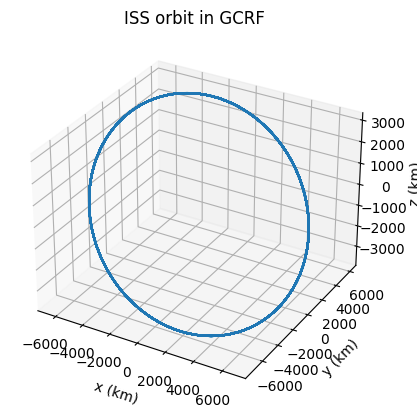

In [17]:
# Simulation of ISS in GCRF for 48 hours

# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

# Constants
mu = 398600.4418 # km^3/s^2
J2 = 1.082626925638815e-3
Re = 6378.1363 # km
omega = 7.2921158553e-5 # rad/s

# Initial conditions
r0 = np.array([orb.r.value[0], orb.r.value[1], orb.r.value[2]])
v0 = np.array([orb.v.value[0], orb.v.value[1], orb.v.value[2]])

# Time span
t = np.linspace(0, 48*3600, 48*3600+1)

# Function to compute the acceleration
def acceleration(r, t):
    r_mag = np.linalg.norm(r)
    r_hat = r/r_mag
    a = -mu/r_mag**2*r_hat
    a[2] = a[2] - 3/2*J2*mu*Re**2/r_mag**4*(5*r[2]**2/r_mag**2-1)*r_hat[2]
    return a

# Function to compute the derivative of the state vector
def state_dot(state, t):
    r = state[:3]
    v = state[3:]
    r_dot = v
    v_dot = acceleration(r, t)
    return np.concatenate((r_dot, v_dot))

# Solving the differential equation
state = odeint(state_dot, np.concatenate((r0, v0)), t)

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state[:,0], state[:,1], state[:,2])
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
ax.set_title('ISS orbit in GCRF')
plt.show()



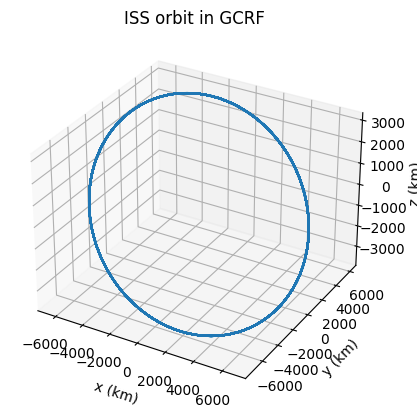

In [33]:
# Simulate ISS in ITRF for 48 hours

# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_body_barycentric, get_body_barycentric_posvel
from astropy import units as u


# Time span
t = np.linspace(0, 48*3600, 48*3600+1)

# Function to compute the acceleration
def acceleration(r, t):
    r_mag = np.linalg.norm(r)
    r_hat = r/r_mag
    a = -mu/r_mag**2*r_hat
    a[2] = a[2] - 3/2*J2*mu*Re**2/r_mag**4*(5*r[2]**2/r_mag**2-1)*r_hat[2]
    return a


# Function to compute the derivative of the state vector
def state_dot(state, t):
    r = state[:3]
    v = state[3:]
    r_dot = v
    v_dot = acceleration(r, t)
    return np.concatenate((r_dot, v_dot))

# Solving the differential equation
state = odeint(state_dot, np.concatenate((r0, v0)), t)

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state[:,0], state[:,1], state[:,2])
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
ax.set_title('ISS orbit in GCRF')
plt.show()

Text(0.5, 0.92, 'ISS orbit in ITRF')

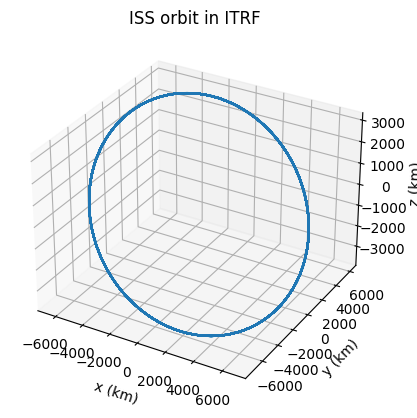

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_body_barycentric, get_body_barycentric_posvel
from astropy import units as u

# Function to crotate GCRF to ITRF with astropy library
def GCRF_to_ITRF(state, t, utc_time):
    # Convert time to astropy time
    t_astropy = Time(utc_time, scale='utc')
    t_astropy = Time(utc_time) + t*u.second
    # Compute the position and velocity of the Earth in GCRF
    earth_pos, earth_vel = get_body_barycentric_posvel('earth', t_astropy)
    # Compute the position and velocity of the ISS in GCRF
    iss_pos = state[:3]
    iss_vel = state[3:]
    # Compute the position and velocity of the ISS in ITRF
    iss_pos_ITRF = iss_pos - earth_pos.xyz.value
    iss_vel_ITRF = iss_vel - earth_vel.xyz.value
    return np.concatenate((iss_pos_ITRF, iss_vel_ITRF))

# Convert the state vector from GCRF to ITRF
utc_time = '1999-01-01T00:00:00'

state_ITRF = np.array([GCRF_to_ITRF(state[i,:], t[i], utc_time) for i in range(len(t))])

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state_ITRF[:,0], state_ITRF[:,1], state_ITRF[:,2])
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
ax.set_title('ISS orbit in ITRF')



In [31]:
t_astropy = Time(utc_time, scale='utc')

In [ ]:
t = np.linspace(0, 48*3, 48*3+1)
t_astropy = Time(t, format='unix', scale='utc')
tt = Time('1999-01-01T00:00:00', format='isot', scale='utc') + t*u.s
print(tt)
print(Time('1999-01-01T00:00:00', format='isot', scale='utc'))

In [ ]:
## earth station location
Latitude = 34.13289
Longitude = 118.03263

## draw a plot which indicates when the ground station can see the ISS
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state_ITRF[:,0], state_ITRF[:,1], state_ITRF[:,2])
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
ax.set_title('ISS orbit in ITRF')

In [ ]:
from astropy.coordinates import EarthLocation, AltAz, get_body
from astropy.time import Time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set the time and location variables
t0 = Time('2023-04-01T00:00:00', format='isot', scale='utc')  # UTC time on the first day of Spring
t1 = t0 + timedelta(hours=48)
lat, lon, elev = 34.224694, -118.057306, 0.03  # Latitude, longitude, and elevation of Los Angeles
los_angeles = EarthLocation(lat=lat, lon=lon, height=elev)


In [ ]:
from skyfield.api import load, EarthSatellite

# Load the necessary data files
ts = load.timescale()
planets = load('de440s.bsp')
earth = planets['earth']

# Set the orbital elements of the ISS
a = 6771.0  # semi-major axis in km
e = 0.0005771  # eccentricity
inc = 51.6409  # inclination in degrees
raan = 88.8414  # right ascension of the ascending node in degrees
argp = 75.2083  # argument of periapsis in degrees
nu = 0.0  # true anomaly in degrees
orb = earth.satellite(a, e, inc, raan, argp, nu)

# Create an EarthSatellite object representing the ISS
iss = EarthSatellite(None, None, None, orb, ts)


In [36]:
## function check ground station visibility
def check_visibility(iss, los_angeles, t0, t1):
    # Compute the position of the ISS in ITRF
    t, pos = iss.at(t1.utc).position.km()
    # Convert the position of the ISS to astropy coordinates
    iss_pos = SkyCoord(pos[:,0], pos[:,1], pos[:,2], unit='km', frame='gcrs', obstime=t, representation_type='cartesian')
    # Convert the position of the ISS to AltAz coordinates
    iss_pos_altaz = iss_pos.transform_to(AltAz(obstime=t, location=los_angeles))
    # Check if the ISS is above the horizon
    iss_above_horizon = iss_pos_altaz.alt > 0*u.deg
    # Check if the ISS is above the elevation limit
    iss_above_elevation_limit = iss_pos_altaz.alt > 10*u.deg
    # Check if the ISS is above the elevation limit and above the horizon
    iss_above_elevation_limit_and_above_horizon = iss_above_elevation_limit & iss_above_horizon
    # Check if the ISS is above the elevation limit and above the horizon at any time
    iss_above_elevation_limit_and_above_horizon_at_any_time = np.any(iss_above_elevation_limit_and_above_horizon)
    return iss_above_elevation_limit_and_above_horizon_at_any_time


from skyfield.api import load
from skyfield.api import EarthSatellite
from astropy.coordinates import EarthLocation
from astropy import units as u

ts = load.timescale()
line1 = '1 25544U 98067A   14020.93268519  .00009878  00000-0  18200-3 0  5082'
line2 = '2 25544  51.6498 109.4756 0003572  55.9686 274.8005 15.49815350868473'
orb = EarthSatellite(line1, line2, 'ISS (ZARYA)', ts)

# iss = EarthSatellite(None, None, None, orb, ts)
los_angeles = EarthLocation(lat=34.13289*u.deg, lon=118.03263*u.deg, height=0.03*u.m)   # Latitude, longitude, and elevation of Los Angeles
t0 = ts.utc(2023, 4, 1, 0, 0, 0)
t1 = ts.utc(2023, 4, 3, 0, 0, 0)


# Check if the ISS is above the elevation limit and above the horizon at any time
iss_above_elevation_limit_and_above_horizon_at_any_time = check_visibility(orb, los_angeles, t0, t1)
print(iss_above_elevation_limit_and_above_horizon_at_any_time)

ValueError: please provide the at() method with a Time instance as its argument, instead of the value CalendarTuple(year=2023, month=4, day=3, hour=0, minute=0, second=0.0)

In [ ]:
import numpy as np
t = np.linspace(t0.utc, t1.utc, num=100)  # array of 100 evenly spaced times
pos_km = orb.at(Time(t[1])).position.km
print(t)

In [39]:
from sgp4.api import Satrec
from sgp4.api import SGP4_ERRORS
s = '1 25544U 98067A   19343.69339541  .00001764  00000-0  38792-4 0  9991'
t = '2 25544  51.6439 211.2001 0007417  17.6667  85.6398 15.50103472202482'
satellite = Satrec.twoline2rv(s, t)
print(satellite)

from astropy.time import Time
t = Time(2458827.362605, format='jd')
error_code, teme_p, teme_v = satellite.sgp4(t.jd1, t.jd2)  # in km and km/s

In [40]:
from astropy.coordinates import TEME, CartesianDifferential, CartesianRepresentation
from astropy import units as u
teme_p = CartesianRepresentation(r0*u.km)
teme_v = CartesianDifferential(v0*u.km/u.s)
teme = TEME(teme_p.with_differentials(teme_v), obstime=t)

In [ ]:
from astropy.coordinates import ITRS
itrs_geo = teme.transform_to(ITRS(obstime=t))
location = itrs_geo.earth_location
location.geodetic  

In [44]:
from skyfield.api import load
from skyfield.api import EarthSatellite
from astropy.coordinates import EarthLocation
from astropy import units as u

ts = load.timescale()
line1 = '1 25544U 98067A   14020.93268519  .00009878  00000-0  18200-3 0  5082'
line2 = '2 25544  51.6498 109.4756 0003572  55.9686 274.8005 15.49815350868473'
orb = EarthSatellite(line1, line2, 'ISS (ZARYA)', ts)

t3 = Time(2458888.362605, format='jd')

from astropy.coordinates import AltAz
los_angeles = EarthLocation(lat=34.13289*u.deg, lon=118.03263*u.deg, height=0.03*u.m)   # Latitude, longitude, and elevation of Los Angeles
iss_pos_altaz = teme.transform_to(AltAz(obstime=t, location=los_angeles))



NotImplementedError: You cannot transform a frame that has velocities to another frame at a different obstime. If you think this should (or should not) be possible, please comment at https://github.com/astropy/astropy/issues/6280

In [42]:
import numpy as np
iss_above_horizon = iss_pos_altaz.alt > 0*u.deg
# # Check if the ISS is above the elevation limit
iss_above_elevation_limit = iss_pos_altaz.alt > 10*u.deg
# # Check if the ISS is above the elevation limit and above the horizon
iss_above_elevation_limit_and_above_horizon = iss_above_elevation_limit & iss_above_horizon
# # Check if the ISS is above the elevation limit and above the horizon at any time
iss_above_elevation_limit_and_above_horizon_at_any_time = np.any(iss_above_elevation_limit_and_above_horizon)
# return iss_above_elevation_limit_and_above_horizon_at_any_time

In [ ]:
t0 = Time('2023-04-11 00:00:00', scale='utc')
t1 = Time('2023-04-13 00:00:00', scale='utc')
locations = [
    EarthLocation(lat=40.0, lon=-105.0, height=1609.34),  # Example location in Colorado, USA
    EarthLocation(lat=-33.0, lon=151.0, height=0.0),  # Example location in Sydney, Australia
    # Add more locations as desired
]

# Loop over the locations and calculate the visibility of the ISS
for location in locations:
    iss_above_elevation_limit_and_above_horizon_at_any_time = check_visibility(orb, location, t0, t1)
    print(iss_above_elevation_limit_and_above_horizon_at_any_time)
    

In [ ]:
# prbital element to tle
from sgp4.api import Satrec
from sgp4.api import SGP4_ERRORS
from sgp4.api import WGS72
from sgp4.api import jday
from sgp4.api import days2mdhms

def orbital_elements_to_tle(epoch, a, e, i, raan, argp, nu, bstar=0.0, ndot=0.0, nddot=0.0, ecco=0.0, argpo=0.0, inclo=0.0, mo=0.0, no=0.0, revnum=0):
    satrec = Satrec()
    satrec.error = 0
    satrec.whichconst = WGS72
    satrec.jdsatepoch = epoch
    satrec.jdsatepochF = epoch - satrec.jdsatepoch
    satrec.bstar = bstar
    satrec.ndot = ndot
    satrec.nddot = nddot
    satrec.ecco = ecco
    satrec.argpo = argpo
    satrec.inclo = inclo
    satrec.mo = mo
    satrec.no = no
    satrec.revnum = revnum
    satrec.satnum = 0
    satrec.epochyr = 0
    satrec.epochdays = 0.0
    satrec.error = 0
    satrec.operationmode = 'i'
    satrec.init = 'n'
    satrec.t = 0.0
    satrec.t2 = 0.0
    satrec.t3cof = 0.0
    satrec.t4cof = 0.0
    satrec.t5cof = 0.0
    satrec.x1mth2 = 0.0
    satrec.x7thm1 = 0.0
    satrec.mdot = 0.0
    satrec.omgcof = 0.0
    satrec.xmcof = 0.0
    satrec.nodecf = 0.0
    satrec.irez = 0
    satrec.d2201 = 0.0
    satrec.d2211 = 0.0
    satrec.d3210 = 0.0
    satrec.d3222 = 0.0
    satrec.d4410 = 0.0
    satrec.d4422 = 0.0
    satrec.d5220 = 0.0
    satrec.d5232 = 0.0
    satrec.d5421 = 0.0
    satrec.d5433 = 0.0
    satrec.dedt = 0.0
    satrec.del1 = 0.0
    satrec.del2 = 0.0
    satrec.del3 = 0.0
    satrec.didt = 0.0
    satrec.dmdt = 0.0
    satrec.dnodt = 0.0
    satrec.domdt = 0.0
    satrec.e3 = 0.0
    satrec.ee2 = 0.0

    return satrec.sgp4init(satrec.whichconst, satrec.operationmode, satrec.satnum, satrec.jdsatepoch - 2433281.5, satrec.bstar, satrec.ndot, satrec.nddot, satrec.ecco, satrec.argpo, satrec.inclo, satrec.mo, satrec.no, satrec.nodeo)

def tle_to_orbital_elements(line1, line2):
    satrec = Satrec.twoline2rv(line1, line2)
    return satrec

def tle_to_orbital_elements(line1, line2):
    satrec = Satrec.twoline2rv(line1, line2)
    return satrec

# example of orbital element to tle
from sgp4.api import Satrec
from sgp4.api import SGP4_ERRORS
from sgp4.api import WGS72
from sgp4.api import jday
from sgp4.api import days2mdhms

def orbital_elements_to_tle(epoch, a, e, i, raan, argp, nu, bstar=0.0, ndot=0.0, nddot=0.0, ecco=0.0, argpo=0.0, inclo=0.0, mo=0.0, no=0.0, revnum=0):
    satrec = Satrec()
    satrec.error = 0
    satrec.whichconst = WGS72
    satrec.jdsatepoch = epoch
    satrec.jdsatepochF = epoch - satrec.jdsatepoch
    satrec.bstar = bstar
    satrec.ndot = ndot
    satrec.nddot = nddot
    satrec.ecco = ecco
    satrec.argpo = argpo
    satrec.inclo = inclo
    satrec.mo = mo
    satrec.no = no
    satrec.revnum = revnum
    satrec.satnum = 0
    satrec.epochyr = 0
    satrec.epochdays = 0.0
    satrec.error = 0
    satrec.operationmode = 'i'
    satrec.init = 'n'
    satrec.t = 0.0
    satrec.t2 = 0.0
    satrec.t3cof = 0.0
    satrec.t4cof = 0.0
    satrec.t5cof = 0.0
    satrec.x1mth2 = 0.0
    satrec.x7thm1 = 0.0
    satrec.mdot = 0.0
    satrec.omgcof = 0.0
    satrec.xmcof = 0.0
    satrec.nodecf = 0.0
    satrec.irez = 0
    satrec.d2201 = 0.0
    satrec.d2211 = 0.0
    satrec.d3210 = 0.0
    satrec.d3222 = 0.0
    satrec.d4410 = 0.0
    satrec.d4422 = 0.0
    satrec.d5220 = 0.0
    satrec.d5232 = 0.0
    satrec.d5421 = 0.0
    satrec.d5433 = 0.0
    satrec.dedt = 0.0
    satrec.del1 = 0.0
    satrec.del2 = 0.0
    satrec.del3 = 0.0
    
    return satrec.sgp4init(satrec.whichconst, satrec.operationmode, satrec.satnum, satrec.jdsatepoch - 2433281.5, satrec.bstar, satrec.ndot, satrec.nddot, satrec.ecco, satrec.argpo, satrec.inclo, satrec.mo, satrec.no, satrec.nodeo)

# orbital_elements_to_tle example



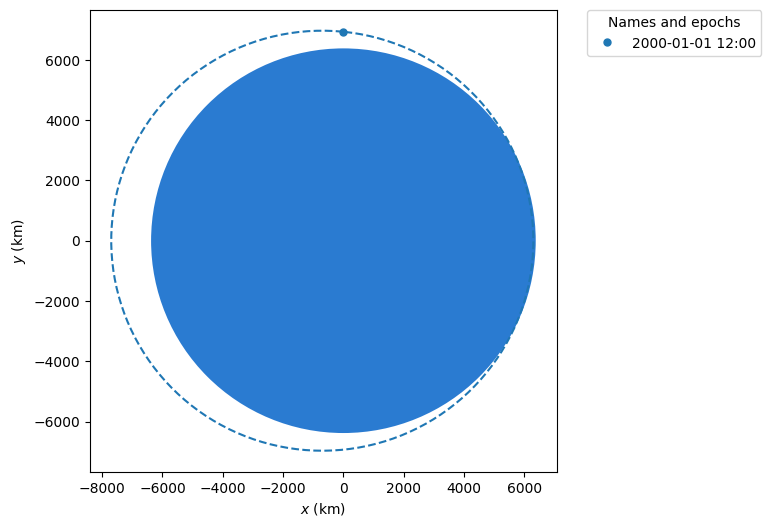

In [1]:
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from astropy import units as u

# Define the orbital elements
a = 7000  # Semi-major axis in km
ecc = 0.1  # Eccentricity
inc = 30.0  # Inclination in degrees
raan = 45.0  # Right ascension of the ascending node in degrees
argp = 60.0  # Argument of periapsis in degrees
nu = 90.0  # True anomaly in degrees

# Create an Orbit object from the orbital elements
orb = Orbit.from_classical(Earth, a * u.km, ecc * u.one, inc * u.deg, raan * u.deg, argp * u.deg, nu * u.deg)

# Convert the Orbit object to a TLE string
# tle = orb.to_tle()
# print(tle)
orb.plot()  


In [ ]:
error_code, teme_p, teme_v = orb.sgp4(t.jd1, t.jd2)  # in km and km/s

In [7]:
# orbital element to tle

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from astropy import units as u

# Define the orbital elements
a = 7000  # Semi-major axis in km
ecc = 0.1  # Eccentricity
inc = 30.0  # Inclination in degrees
raan = 45.0  # Right ascension of the ascending node in degrees
argp = 60.0  # Argument of periapsis in degrees
nu = 90.0  # True anomaly in degrees

# Create an Orbit object from the orbital elements
orb = Orbit.from_classical(Earth, a * u.km, ecc * u.one, inc * u.deg, raan * u.deg, argp * u.deg, nu * u.deg)

# Convert the Orbit object to a TLE string
tle = orb.to_tle()

AttributeError: 'Orbit' object has no attribute 'to_tle'

In [15]:
from tletools import TLE

a = TLE(name='ISS (ZARYA)', norad='25544', classification='U', int_desig='98067A',
epoch_year=2019, epoch_day=249.04864348, dn_o2=1.909e-05, ddn_o6=0.0, bstar=4.0858e-05,
set_num=999, inc=51.6464, raan=320.1755, ecc=0.0007999, argp=10.9066, M=53.2893,
n=15.50437522, rev_num=18780)

In [16]:
print(a)

TLE(name='ISS (ZARYA)', norad='25544', classification='U', int_desig='98067A', epoch_year=2019, epoch_day=249.04864348, dn_o2=1.909e-05, ddn_o6=0.0, bstar=4.0858e-05, set_num=999, inc=51.6464, raan=320.1755, ecc=0.0007999, argp=10.9066, M=53.2893, n=15.50437522, rev_num=18780)
